In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\HP\\OneDrive\\Documents\\DSBACODINGTEST\\datasets\\PLTR_2020-09-30_2025-09-09.csv')

In [ ]:
data.head(1240)

,date,open,high,low,close,adj_close,volume
0,NaN,PLTR,PLTR,PLTR,PLTR,PLTR,PLTR
1,2020-09-30,10.0,11.40999984741211,9.109999656677246,9.5,9.5,338584400
2,2020-10-01,9.6899995803833,10.100000381469727,9.229999542236328,9.460000038146973,9.460000038146973,124297600
3,2020-10-02,9.0600004196167,9.279999732971191,8.9399995803833,9.199999809265137,9.199999809265137,55018300
4,2020-10-05,9.430000305175781,9.489999771118164,8.920000076293945,9.029999732971191,9.029999732971191,36316900
...,...,...,...,...,...,...,...
1235,2025-08-29,156.97999572753906,158.4199981689453,153.0,156.7100067138672,156.7100067138672,45270500
1236,2025-09-02,151.1999969482422,158.38999938964844,150.27999877929688,157.08999633789062,157.08999633789062,65435000
1237,2025-09-03,158.0,161.14999389648438,152.7100067138672,154.89999389648438,154.89999389648438,66052300
1238,2025-09-04,154.86500549316406,157.0399932861328,153.16000366210938,156.13999938964844,156.13999938964844,53292300


In [13]:
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')
data.set_index('date', inplace=True)
ts = data['close']
print(ts.head())


date
2020-09-30                  9.5
2020-10-01    9.460000038146973
2020-10-02    9.199999809265137
2020-10-05    9.029999732971191
2020-10-06    9.899999618530273
Name: close, dtype: object


In [22]:
data['close'] = pd.to_numeric(data['close'], errors='coerce')
data['day'] = np.arange(len(data))


In [23]:
X = data[['day']]      # Feature
y = data['close']      # Target

# 4. Train-test split (80% train, 20% test)
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Remove NaN from y_test and align y_pred accordingly
mask = ~y_test.isna()
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask.values]  # y_pred is numpy array, mask.values is boolean array

mae = mean_absolute_error(y_test_clean, y_pred_clean)
rmse = np.sqrt(mean_squared_error(y_test_clean, y_pred_clean))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 81.86, RMSE: 91.54


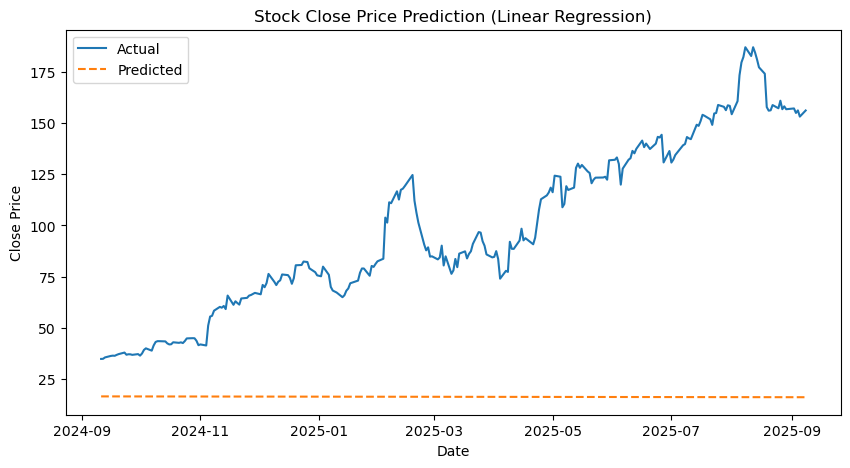

In [36]:
# 8. Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted", linestyle="--")
plt.title("Stock Close Price Prediction (Linear Regression)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


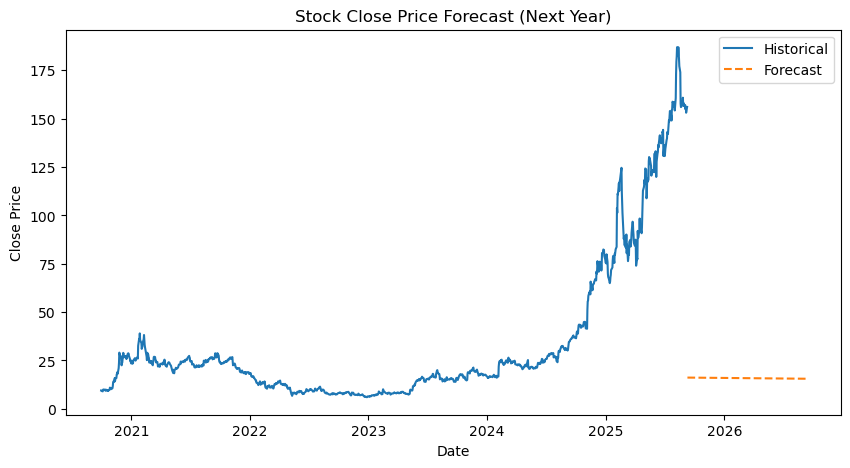

In [38]:
# 9. Forecast into the future (e.g., +365 days)
future_days = np.arange(len(data), len(data)+365).reshape(-1,1)
future_preds = model.predict(future_days)

plt.figure(figsize=(10,5))
plt.plot(data.index, data['close'], label="Historical")
# Use the last valid date from the index for the forecast
last_date = data.index[-2] if pd.isna(data.index[-1]) else data.index[-1]
future_dates = pd.date_range(last_date, periods=366, freq="D")[1:]
plt.plot(future_dates, future_preds, label="Forecast", linestyle="--")
plt.title("Stock Close Price Forecast (Next Year)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [18]:
print(ts.index.min(), "to", ts.index.max())
print(ts.head())
print(ts.tail())


2020-09-30 00:00:00 to 2025-09-08 00:00:00
date
2020-09-30                  9.5
2020-10-01    9.460000038146973
2020-10-02    9.199999809265137
2020-10-05    9.029999732971191
2020-10-06    9.899999618530273
Name: close, dtype: object
date
2025-09-03    154.89999389648438
2025-09-04    156.13999938964844
2025-09-05    153.11000061035156
2025-09-08    156.10000610351562
NaT                         PLTR
Name: close, dtype: object


In [20]:
print(data.dtypes)


open          object
high          object
low           object
close        float64
adj_close     object
volume        object
dtype: object


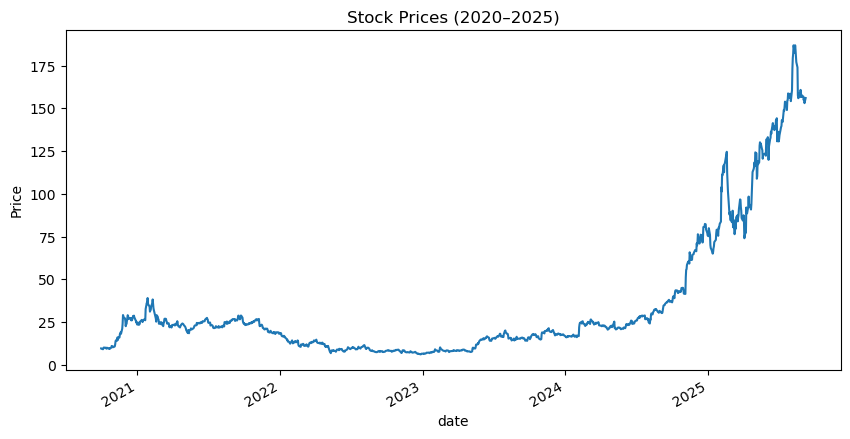

In [21]:
# Ensure ts is numeric and drop non-numeric/NaN values before plotting
ts_numeric = pd.to_numeric(ts, errors='coerce').dropna()

ts_numeric.plot(figsize=(10,5), title="Stock Prices (2020–2025)")
plt.ylabel("Price")
plt.show()


In [12]:
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1240 entries, 1 to 1240
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       1240 non-null   object
 1   open       1240 non-null   object
 2   high       1240 non-null   object
 3   low        1240 non-null   object
 4   close      1240 non-null   object
 5   adj_close  1240 non-null   object
 6   volume     1240 non-null   object
dtypes: object(7)
memory usage: 77.5+ KB
None


In [43]:
import numpy as np

sims= 10000

a = np.random.normal(1,4,sims)
b = np.random.normal(3,7,sims)

duration = a + b

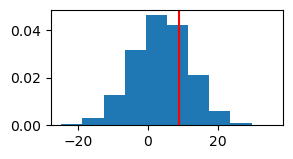

0.2686


In [45]:
plt.figure(figsize=(3,1.5))
plt.hist(duration, density=True)
plt.axvline(9, color='red')
plt.show()
print((duration >9).sum()/sims)